In [12]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

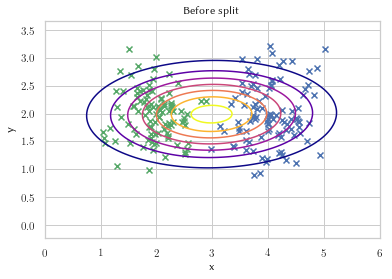

In [13]:
mean_1 = [2, 2]
mean_2 = [4, 2]
cov = [[0.2, 0], [0, 0.2]]

sample_1 = np.random.multivariate_normal(mean_1, cov, 100).T
x_1, y_1 = sample_1[0], sample_1[1]

sample_2 = np.random.multivariate_normal(mean_2, cov, 100).T
x_2, y_2 = sample_2[0], sample_2[1]

total_sample = np.hstack((sample_1, sample_2))
x_t, y_t = total_sample[0], total_sample[1]
mean_t = total_sample.mean(axis=1)
cov_t = np.cov(total_sample)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(0, 6, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# On if BEFORE SPLIT
rv = multivariate_normal(mean_t, cov_t)
plt.contour(X, Y, rv.pdf(pos), cmap=cm.plasma)

# ON if AFTER SPLIT
# rv_1 = multivariate_normal(mean_1, cov)
# plt.contour(X, Y, rv_1.pdf(pos), cmap=cm.plasma)

# rv_2 = multivariate_normal(mean_2, cov)
# plt.contour(X, Y, rv_2.pdf(pos), cmap=cm.plasma)

plt.title("Before split")
plt.scatter(x_1, y_1, marker='x', color='g')
plt.scatter(x_2, y_2, marker='x', color='b')
plt.xlim(0,6)
plt.ylim(0,3)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# Change name for BEFORE SPLIT or AFTER SPLIT
# plt.savefig('before_split.svg', format='svg')
# plt.savefig('after_split.svg', format='svg')
plt.show()

<Figure size 432x288 with 0 Axes>

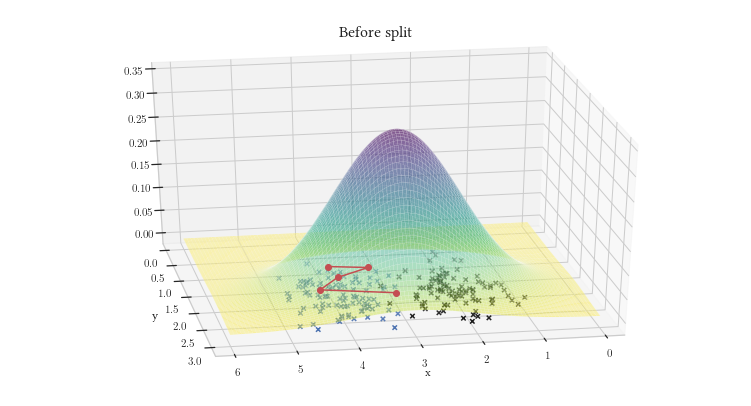

In [48]:
fig = plt.figure()
fig = plt.figure(figsize=(13,7))
ax = fig.gca(projection='3d')

mean_1 = [2, 2]
mean_2 = [4, 2]
cov = [[0.2, 0], [0, 0.2]]

# Two 'promising' subgroups
sample_1 = np.random.multivariate_normal(mean_1, cov, 100).T
x_1, y_1 = sample_1[0], sample_1[1]

sample_2 = np.random.multivariate_normal(mean_2, cov, 100).T
x_2, y_2 = sample_2[0], sample_2[1]

# Calculate the total distribution from two subgroups
total_sample = np.hstack((sample_1, sample_2))
x_t, y_t = total_sample[0], total_sample[1]
mean_t = total_sample.mean(axis=1)
cov_t = np.cov(total_sample)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(0, 6, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Single distribution with high variance in one direction
rv = multivariate_normal(mean_t, cov_t)
ax.plot_surface(X, Y, rv.pdf(pos), cmap=cm.viridis_r, rstride=1, cstride=1, linewidth=0.1, alpha=0.4)


# FAKE MEAN PATH XD
mean_path = np.array([mean_t, [mean_t[0]+1.2, mean_t[1]-0.2], [mean_t[0]+0.8, mean_t[1]-0.55], [mean_t[0]+0.2, mean_t[1]-0.81], [mean_t[0]+0.85, mean_t[1]-0.9]])

# Two groups scatter
ax.scatter(x_1, y_1, 0, marker='x', color='k')
ax.scatter(x_2, y_2, 0, marker='x', color='b')

# Mean path plot
ax.plot(mean_path[:,0],mean_path[:,1], 0, color='r', marker='o')

# Plot settings
plt.title("Before split", fontsize=16)
plt.xlim(0,6)
plt.ylim(1,4)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
# Change view point
ax.view_init(30, 80)

plt.savefig('before_split.svg', format='svg')

plt.show()

<Figure size 432x288 with 0 Axes>

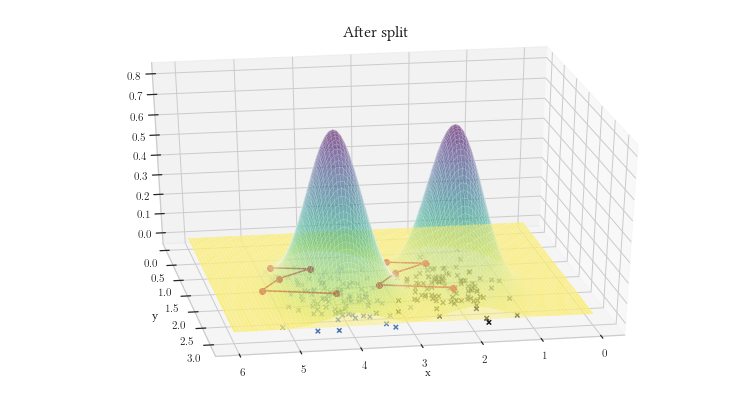

In [47]:
fig = plt.figure()
fig = plt.figure(figsize=(13,7))
ax = fig.gca(projection='3d')

mean_1 = [2, 2]
mean_2 = [4, 2]
cov = [[0.2, 0], [0, 0.2]]

# Two 'promising' subgroups
sample_1 = np.random.multivariate_normal(mean_1, cov, 100).T
x_1, y_1 = sample_1[0], sample_1[1]

sample_2 = np.random.multivariate_normal(mean_2, cov, 100).T
x_2, y_2 = sample_2[0], sample_2[1]

# Calculate the total distribution from two subgroups
total_sample = np.hstack((sample_1, sample_2))
x_t, y_t = total_sample[0], total_sample[1]
mean_t = total_sample.mean(axis=1)
cov_t = np.cov(total_sample)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(0, 6, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# ON if AFTER SPLIT
rv_1 = multivariate_normal(mean_1, cov)
ax.plot_surface(X, Y, rv_1.pdf(pos), cmap=cm.viridis_r, rstride=1, cstride=1, linewidth=0.1, alpha=0.4)

rv_2 = multivariate_normal(mean_2, cov)
ax.plot_surface(X, Y, rv_2.pdf(pos), cmap=cm.viridis_r, rstride=1, cstride=1, linewidth=0.1, alpha=0.4)

# FAKE MEAN PATH XD
mean_path = np.array([mean_t, [mean_t[0]+1.2, mean_t[1]-0.2], [mean_t[0]+0.8, mean_t[1]-0.55], [mean_t[0]+0.2, mean_t[1]-0.81], [mean_t[0]+0.85, mean_t[1]-0.9]])
difference_mean_and_mean_1 = mean_t - mean_1
mean_path_1 = mean_path-difference_mean_and_mean_1
difference_mean_and_mean_2 = mean_t - mean_2
mean_path_2 = mean_path-difference_mean_and_mean_2

# Two groups scatter
ax.scatter(x_1, y_1, 0, marker='x', color='k')
ax.scatter(x_2, y_2, 0, marker='x', color='b')

# Mean path plot
# ax.plot(mean_path[:,0],mean_path[:,1], color='r', marker='o')
ax.plot(mean_path_1[:,0], mean_path_1[:,1], 0, color='r', marker='o')
ax.plot(mean_path_2[:,0], mean_path_2[:,1], 0, color='r', marker='o')

# Plot settings
plt.title("After split", fontsize=16)
plt.xlim(0,6)
plt.ylim(1,4)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
# Change view point
ax.view_init(30, 80)

plt.savefig('after_split.svg', format='svg')

plt.show()